In [56]:
import sys
sys.path.append('..')

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import scanpy as sc
import anndata as ad
import numpy as np
import scmulti
from random import shuffle
from scipy import sparse
from matplotlib import pyplot as plt

In [59]:
%config InlineBackend.figure_format = 'retina'

# Load the dataset

In [60]:
rna_kotliarov = sc.read_h5ad('../data/kotliarov-2020/expressions.h5ad')
rna_kotliarov.var_names_make_unique()
rna_kotliarov

AnnData object with n_obs × n_vars = 53196 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [61]:
cite_kotliarov = sc.read_h5ad('../data/kotliarov-2020/protein.h5ad')
cite_kotliarov.var_names_make_unique()
cite_kotliarov

AnnData object with n_obs × n_vars = 53196 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [62]:
rna10x = sc.read_h5ad('../data/10xpbmc10k-2020/expressions.h5ad')
rna10x.var_names_make_unique()
rna10x

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [63]:
atac10x = sc.read_h5ad('../data/10xpbmc10k-2020/peaks.h5ad')
atac10x.var_names_make_unique()
atac10x

AnnData object with n_obs × n_vars = 10000 × 40018
    obs: 'cell_type', 'nb_features'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [64]:
rna_kotliarov.obs['cell_type'] = rna_kotliarov.obs['cluster_level1'].astype('category')
cite_kotliarov.obs['cell_type'] = cite_kotliarov.obs['cluster_level1'].astype('category')

In [65]:
rna_gayoso = sc.read_h5ad('../data/gayoso-steier-2020/expressions.h5ad')
rna_gayoso.obs['cell_type'] = rna_gayoso.obs['cell_types']
rna_gayoso

AnnData object with n_obs × n_vars = 30293 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'cell_type'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [66]:
rna_gayoso.var_names = rna_gayoso.var_names.str.upper()
rna_gayoso.var_names_make_unique()

In [67]:
rna_granja = sc.read_h5ad('../data/granja-2019/expressions-ctrl.h5ad')
rna_granja

AnnData object with n_obs × n_vars = 35434 × 3172
    obs: 'Group', 'nUMI_pre', 'nUMI', 'nGene', 'cell_type', 'Barcode', 'condition', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_id', 'exonLength', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_umap'

## Make all datasets 10k cell long

In [68]:
n_samples = 10000
np.random.seed(42)

granja_sample_indices = np.random.choice(rna_granja.shape[0], size=n_samples, replace=False)
kotliarov_sample_indices = np.random.choice(rna_kotliarov.shape[0], size=n_samples, replace=False)
gayoso_sample_indices = np.random.choice(rna_gayoso.shape[0], size=n_samples, replace=False)

rna_granja = rna_granja[granja_sample_indices]
rna_kotliarov = rna_kotliarov[kotliarov_sample_indices]
cite_kotliarov = cite_kotliarov[kotliarov_sample_indices]
rna_gayoso = rna_gayoso[gayoso_sample_indices]

## Allign the labels

In [69]:
rna_kotliarov.obs.cell_type.cat.categories

Index(['CD4 naive', 'CD4 memory T', 'Classical monocytes and mDC', 'B',
       'CD8 memory T', 'NK', 'CD8 naive', 'Unconventional T cells',
       'Non-classical monocytes', 'pDC'],
      dtype='object')

In [70]:
rna_gayoso.obs.cell_type.cat.categories

Index(['Activated CD4 T', 'B1 B', 'CD122+ CD8 T', 'CD4 T', 'CD8 T',
       'Erythrocytes', 'GD T', 'ICOS-high Tregs', 'Ifit3-high B',
       'Ifit3-high CD4 T', 'Ifit3-high CD8 T', 'Ly6-high mono', 'Ly6-low mono',
       'MZ B', 'MZ/Marco-high macrophages', 'Mature B', 'Migratory DCs', 'NK',
       'NKT', 'Neutrophils', 'Plasma B', 'Red-pulp macrophages',
       'Transitional B', 'Tregs', 'cDC1s', 'cDC2s', 'pDCs'],
      dtype='object')

In [71]:
new_cell_types_gayoso = {'Activated CD4 T': 'CD4 memory', 
                         'B1 B': 'B', 
                         'CD122+ CD8 T': 'Unconventional T cells', 
                         'CD4 T': 'CD4 naive', 
                         'CD8 T': 'CD8 naive',
                         'Erythrocytes': 'Erythrocytes', 
                         'GD T': 'Unconventional T cells', 
                         'ICOS-high Tregs': 'Unconventional T cells', 
                         'Ifit3-high B': 'B',
                         'Ifit3-high CD4 T': 'Unconventional T cells', 
                         'Ifit3-high CD8 T': 'Unconventional T cells', 
                         'Ly6-high mono' : 'Classical monocytes and mDC', 
                         'Ly6-low mono': 'Non-classical monocytes',
                         'MZ B': 'B', 
                         'MZ/Marco-high macrophages': 'Macrophages', 
                         'Mature B': 'B', 
                         'Migratory DCs': 'Classical monocytes and mDC', 
                         'NK': 'NK',
                         'NKT': 'Unconventional T cells', 
                         'Neutrophils': 'Neutrophils', 
                         'Plasma B': 'B', 
                         'Red-pulp macrophages': 'Macrophages',
                         'Transitional B': 'B', 
                         'Tregs': 'Unconventional T cells', 
                         'cDC1s': 'Classical monocytes and mDC', 
                         'cDC2s': 'Classical monocytes and mDC', 
                         'pDCs': 'pDC'
    
}

In [72]:
rna_granja.obs.cell_type.cat.categories

Index(['01_HSC', '02_Early.Eryth', '03_Late.Eryth', '04_Early.Baso',
       '05_CMP.LMPP', '06_CLP.1', '07_GMP', '08_GMP.Neut', '09_pDC', '10_cDC',
       '11_CD14.Mono.1', '12_CD14.Mono.2', '13_CD16.Mono', '14_Unk',
       '15_CLP.2', '16_Pre.B', '17_B', '18_Plasma', '19_CD8.N', '20_CD4.N1',
       '21_CD4.N2', '22_CD4.M', '23_CD8.EM', '24_CD8.CM', '25_NK', '26_Unk'],
      dtype='object')

In [73]:
new_cell_types_granja = {'01_HSC': 'HSC', 
                         '02_Early.Eryth':'Erythrocytes', 
                         '03_Late.Eryth': 'Erythrocytes', 
                         '04_Early.Baso': 'Basophils',
                         '05_CMP.LMPP' : 'CMP', 
                         '06_CLP.1': 'CLP', 
                         '07_GMP' : 'GMP', 
                         '08_GMP.Neut' : 'Neutrophils', 
                         '09_pDC': 'pDC', 
                         '10_cDC': 'Classical monocytes and mDC',
                         '11_CD14.Mono.1': 'Classical monocytes and mDC', 
                         '12_CD14.Mono.2': 'Classical monocytes and mDC', 
                         '13_CD16.Mono': 'Non-classical monocytes', 
                         '14_Unk': 'Unknown',
                         '15_CLP.2' : 'CLP', 
                         '16_Pre.B' : 'B', 
                         '17_B': 'B', 
                         '18_Plasma': 'Plasma', 
                         '19_CD8.N': 'CD8 naive', 
                         '20_CD4.N1': 'CD4 naive',
                         '21_CD4.N2': 'CD4 naive', 
                         '22_CD4.M': 'CD4 memory T', 
                         '23_CD8.EM': 'CD8 memory T', 
                         '24_CD8.CM': 'CD8 memory T', 
                         '25_NK': 'NK', 
                         '26_Unk': 'Unknown'
    
}

In [74]:
rna10x.obs.cell_type.cat.categories

Index(['CD56 (bright) NK cells', 'CD56 (dim) NK cells', 'MAIT T cells',
       'classical monocytes', 'effector CD8 T cells', 'intermediate monocytes',
       'memory B cells', 'memory CD4 T cells', 'myeloid DC', 'naive B cells',
       'naive CD4 T cells', 'naive CD8 T cells', 'non-classical monocytes',
       'plasmacytoid DC'],
      dtype='object')

In [75]:
# make types more general for now
new_cell_types_10x = {'CD56 (bright) NK cells': 'NK', 'CD56 (dim) NK cells': 'NK', 'MAIT T cells': 'Unconventional T cells',
                  'classical monocytes': 'Classical monocytes and mDC', 'effector CD8 T cells': 'CD8 effector', 'intermediate monocytes': 'Intermediate monocytes',
                  'memory B cells': 'B', 'memory CD4 T cells': 'CD4 memory T', 'myeloid DC': 'Classical monocytes and mDC', 'naive B cells':'B',
                  'naive CD4 T cells': 'CD4 naive', 'naive CD8 T cells': 'CD8 naive', 'non-classical monocytes': 'Non-classical monocytes',
                   'plasmacytoid DC': 'pDC'
                 }

In [76]:
new_10x_cell_types = [new_cell_types_10x[name] for name in rna10x.obs.cell_type]
new_granja_cell_types = [new_cell_types_granja[name] for name in rna_granja.obs.cell_type]
new_gayoso_cell_types = [new_cell_types_gayoso[name] for name in rna_gayoso.obs.cell_type]

In [77]:
# 10x
rna10x.obs.cell_type = new_10x_cell_types
atac10x.obs.cell_type = new_10x_cell_types

# granja
rna_granja.obs.cell_type = new_granja_cell_types

# gayoso
rna_gayoso.obs.cell_type = new_gayoso_cell_types

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [78]:
rna10x

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

## Choose shared features

In [79]:
# batch 0, 1, 2, 3
common = rna10x.concatenate(rna_gayoso, rna_kotliarov, rna_granja)

/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/anndata/_core/merge.py:894: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [80]:
rna10x = common[common.obs['batch'] == '0']
rna_gayoso = common[common.obs['batch'] == '1']
rna_kotliarov = common[common.obs['batch'] == '2']
rna_granja = common[common.obs['batch'] == '3']

# Paired setting

## Configure and train the model

In [81]:
model = scmulti.models.MultiVAE(
    adatas=[[rna10x, rna_kotliarov, rna_gayoso, rna_granja], [cite_kotliarov], [atac10x]],
    names=[['scRNA-seq-10x','scRNA-seq-kotliarov', 'scRNA-seq-gayoso', 'scRNA-seq-granja'], ['CITE-seq-kotliarov'], ['ATAC-seq-10x']],
    pair_groups=[[0, 1, 2, 3], [1], [0]],
    z_dim=20,
    h_dim=128,
    hiddens=[],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-5,
    integ_coef=5e-2,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [82]:
model.train(
    n_iters=10000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
)

 |██------------------| 10.0% iter=1001/10000, time=522.43(s), loss=2.2085, recon=1.6713, kl=104.8636, integ=10.7236, val_loss=115.3153, val_recon=1.2418, val_kl=144.0724, val_integ=7.6812
 |████----------------| 20.0% iter=2001/10000, time=518.66(s), loss=1.6668, recon=1.3784, kl=193.3236, integ=5.7306, val_loss=98.6416, val_recon=1.1295, val_kl=217.8806, val_integ=5.2012
 |██████--------------| 30.0% iter=3001/10000, time=550.07(s), loss=1.4922, recon=1.3169, kl=265.2384, integ=3.4528, val_loss=88.5133, val_recon=1.0629, val_kl=293.8944, val_integ=3.6577
 |████████------------| 40.0% iter=4001/10000, time=627.82(s), loss=1.4041, recon=1.2937, kl=347.9204, integ=2.1393, val_loss=81.9065, val_recon=1.0240, val_kl=378.9645, val_integ=2.5564
 |██████████----------| 50.0% iter=5001/10000, time=571.08(s), loss=1.3203, recon=1.2406, kl=425.6372, integ=1.5080, val_loss=78.0051, val_recon=1.0063, val_kl=458.8474, val_integ=1.7936
 |████████████--------| 60.0% iter=6001/10000, time=541.17(s), 

## Plot training history

In [83]:
model.history

,iteration,train_loss,train_recon,train_kl,train_integ,val_loss,val_recon,val_kl,val_integ
0,1000,2.208534,1.671305,104.863580,10.723590,115.315263,1.241761,144.072404,7.681240
1,2000,1.666816,1.378353,193.323550,5.730593,98.641622,1.129520,217.880638,5.201194
2,3000,1.492213,1.316921,265.238403,3.452800,88.513333,1.062865,293.894393,3.657704
3,4000,1.404136,1.293692,347.920410,2.139296,81.906513,1.023960,378.964539,2.556351
4,5000,1.320268,1.240610,425.637201,1.508035,78.005118,1.006342,458.847352,1.793627
5,6000,1.271665,1.214006,505.349878,1.052101,75.359278,0.993115,536.602061,1.298374
6,7000,1.241653,1.195568,589.416272,0.803817,73.396893,0.977526,619.167110,1.039488
7,8000,1.241132,1.200900,663.835999,0.671887,71.651471,0.957432,686.914007,0.935793
8,9000,1.193692,1.152803,724.623633,0.672846,71.651963,0.958782,732.539229,0.898275
9,9999,1.187431,1.150200,747.837988,0.595044,71.104942,0.951917,772.474623,0.872979


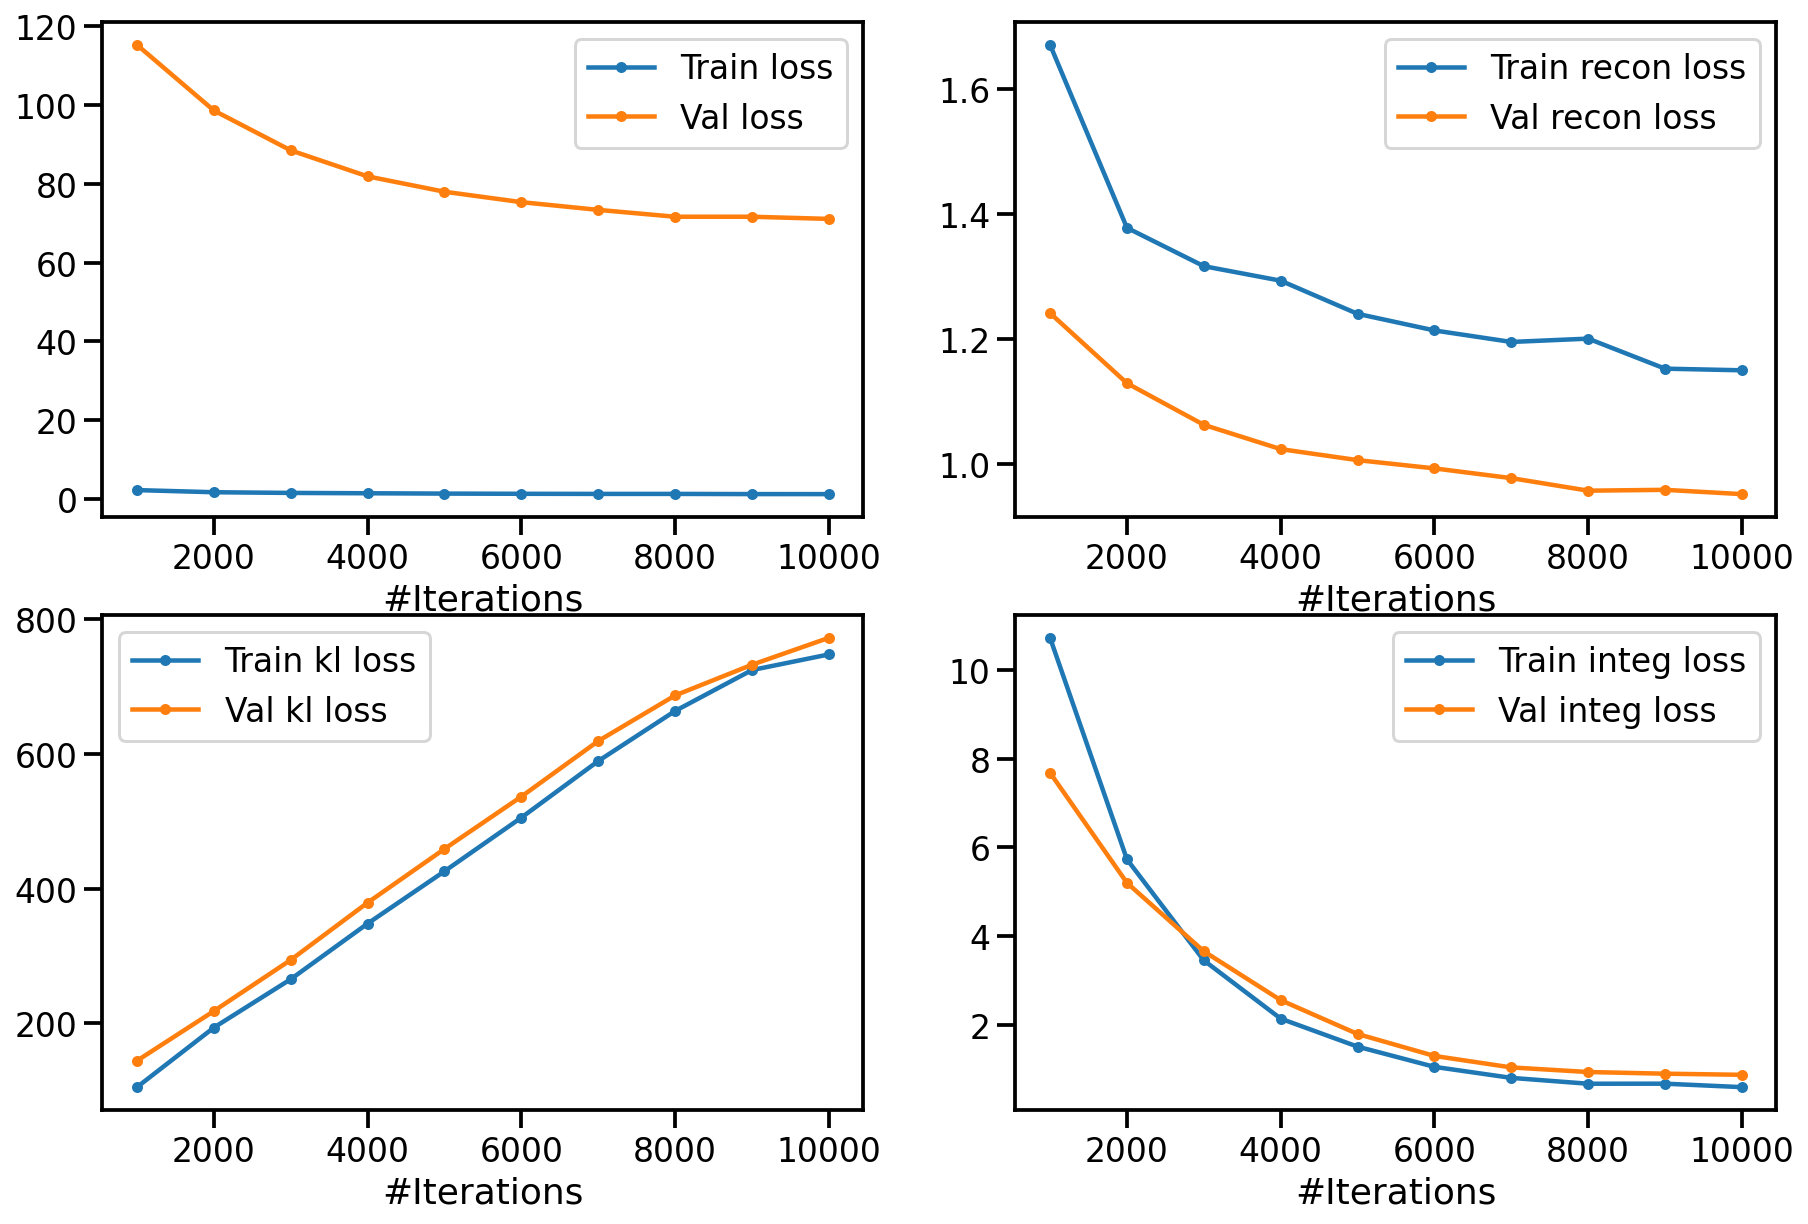

In [84]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

## Recover and visualize the latent space

In [85]:
z = model.predict(
    adatas=[[rna10x, rna_kotliarov, rna_gayoso, rna_granja], [cite_kotliarov], [atac10x]],
    names=[['scRNA-seq-10x','scRNA-seq-kotliarov', 'scRNA-seq-gayoso', 'scRNA-seq-granja'], ['CITE-seq-kotliarov'], ['ATAC-seq-10x']],
    batch_size=64,
)
z

AnnData object with n_obs × n_vars = 60000 × 20
    obs: 'modality', 'cell_type', 'batch'

In [86]:
sc.tl.pca(z, svd_solver='arpack')

... storing 'modality' as categorical
... storing 'cell_type' as categorical


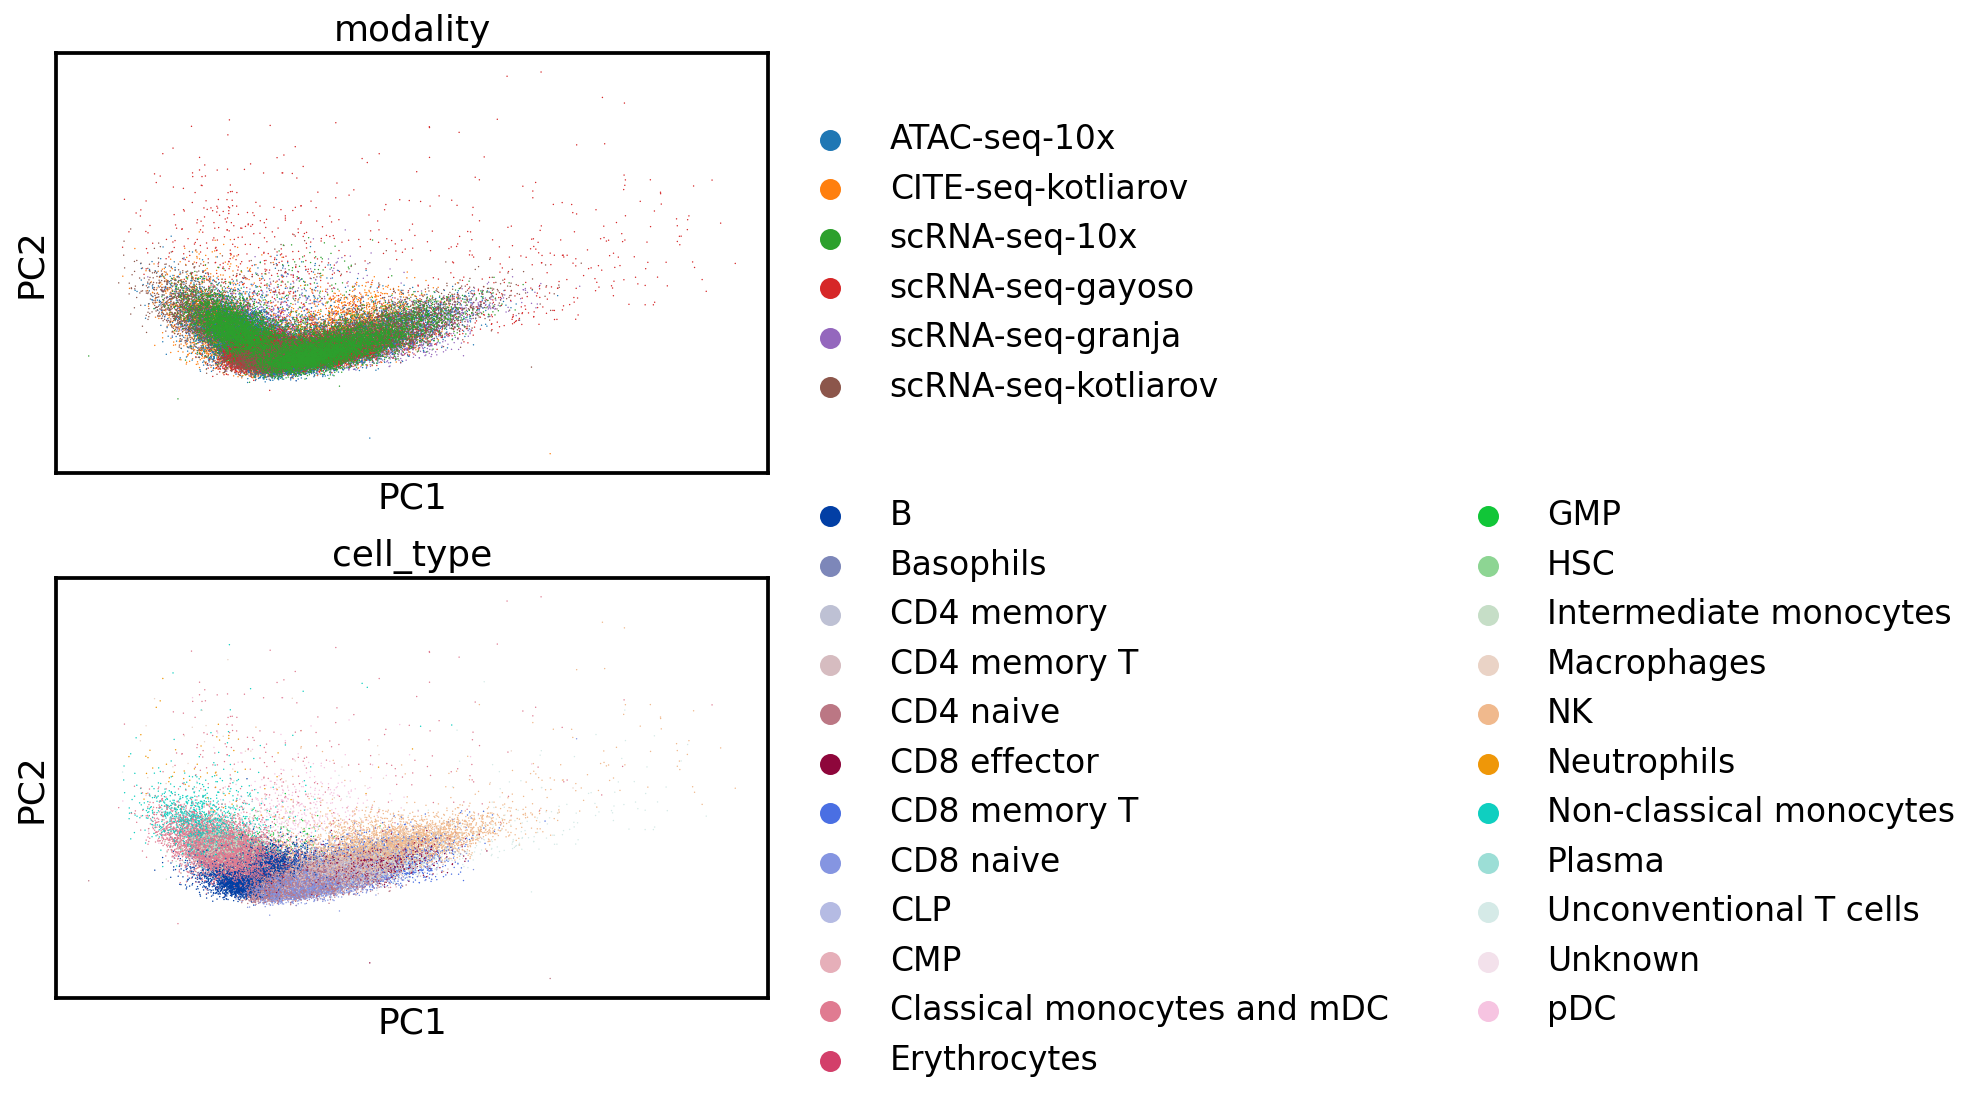

In [87]:
sc.pl.pca(z, color=['modality', 'cell_type'], ncols = 1)

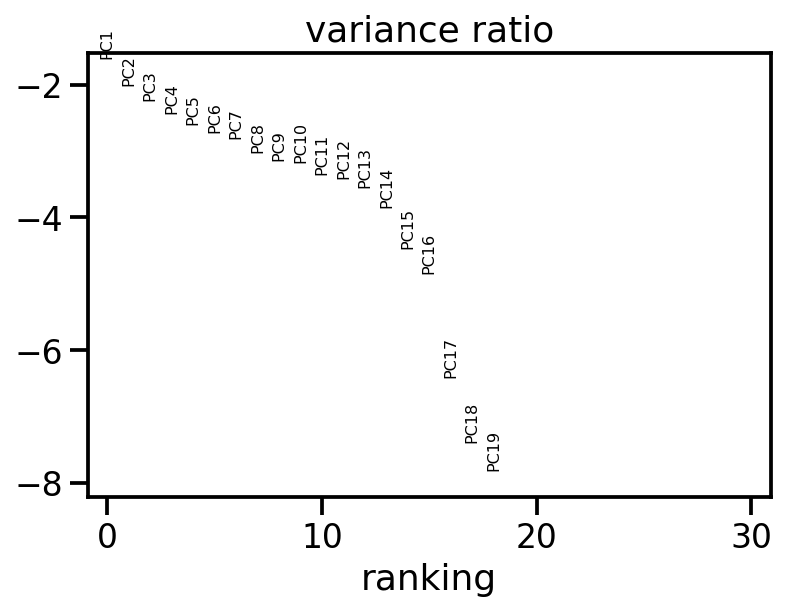

In [88]:
sc.pl.pca_variance_ratio(z, log=True)

In [89]:
sc.pp.neighbors(z, n_neighbors=10, n_pcs=16)

/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities


In [90]:
sc.tl.umap(z)

/Users/alitinet/opt/miniconda3/envs/mulgr/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


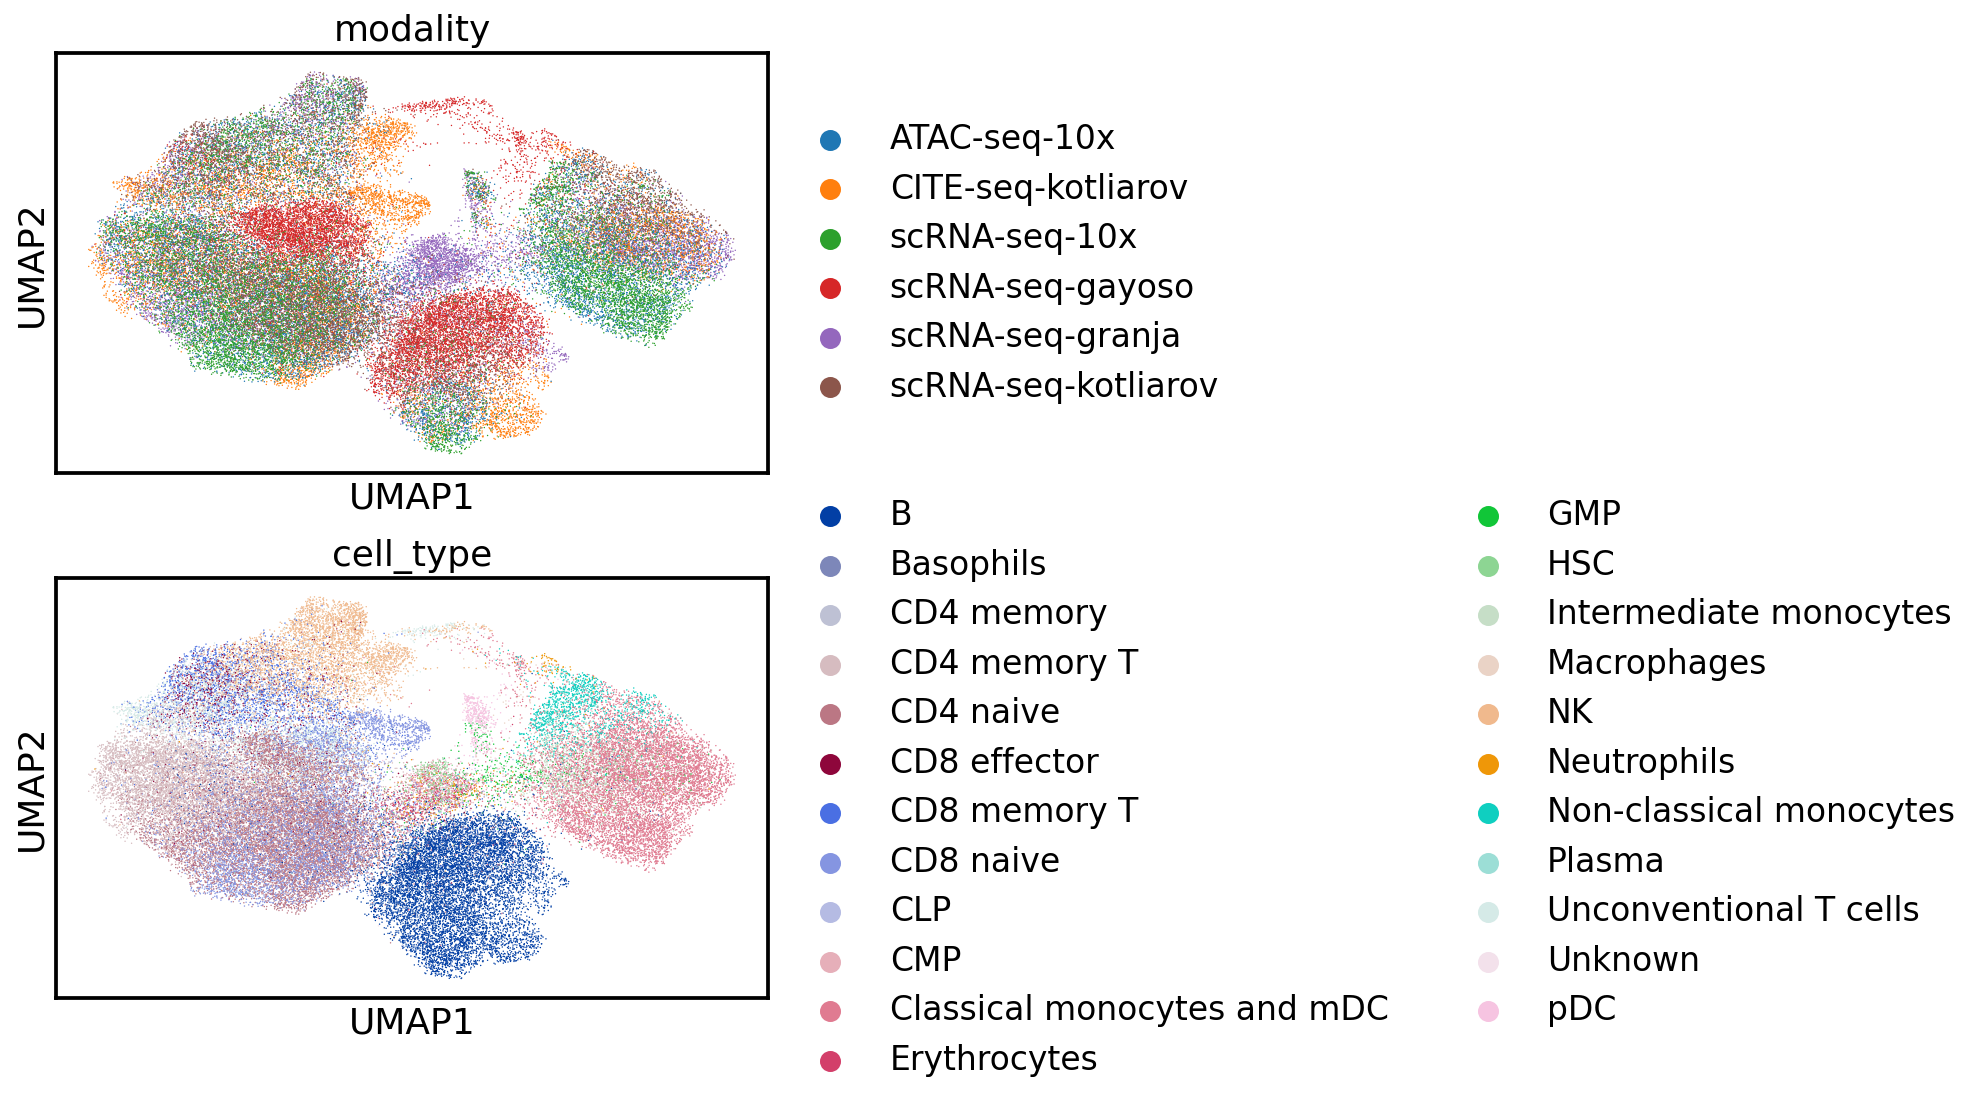

In [91]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

# Metrics

In [92]:
scmulti.metrics.nmi(z, label_key='modality')

0.02046262498437133

In [93]:
scmulti.metrics.asw(z, label_key='modality')

-0.010570522397756577

In [94]:
scmulti.metrics.asw(z, label_key='cell_type')

-0.03679109364748001

In [ ]:
metrics = scmulti.metrics.scibmetrics.metrics(
    z, z,
    batch_key='modality',
    label_key='cell_type',
    hvg_score_=False,
    nmi_=True,
    ari_=True,
    silhouette_=True,
)
metrics

# Unpaired

## Configure and train the model

In [ ]:
model = scmulti.models.MultiVAE(
    adatas=[[scrna, rna], [cite], [scatac]],
    names=[['scRNA-seq-kotliarov', 'scRNA-seq-10x'], ['scCITE-seq-kotliarov'], ['scATAC-seq-10x']],
    pair_groups=[[0, 1], [2], [3]],
    z_dim=20,
    h_dim=128,
    hiddens=[],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-5,
    integ_coef=1e-2,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [ ]:
model.model

In [ ]:
model.train(
    n_iters=10000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
)

## Plot training history

In [ ]:
model.history

In [ ]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

## Recover and visualize the latent space

In [ ]:
z = model.predict(
    adatas=[[scrna, rna], [cite], [scatac]],
    names=[['scRNA-seq-kotliarov', 'scRNA-seq-10x'], ['scCITE-seq-kotliarov'], ['scATAC-seq-10x']],
    batch_size=64,
)
z

In [ ]:
sc.tl.pca(z, svd_solver='arpack')

In [ ]:
sc.pl.pca(z, color=['modality', 'cell_type'], ncols = 1)

In [ ]:
sc.pl.pca_variance_ratio(z, log=True)

In [ ]:
sc.pp.neighbors(z, n_neighbors=10, n_pcs=9)

In [ ]:
sc.tl.umap(z)

In [ ]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

# Metrics

In [ ]:
scmulti.metrics.nmi(z, label_key='modality')

In [ ]:
scmulti.metrics.asw(z, label_key='modality')

In [ ]:
scmulti.metrics.asw(z, label_key='cell_type')

In [ ]:
metrics = scmulti.metrics.scibmetrics.metrics(
    z, z,
    batch_key='modality',
    label_key='cell_type',
    hvg_score_=False,
    nmi_=True,
    ari_=True,
    silhouette_=True,
)
metrics